In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
#Problème décodage caractères UTF-8, ajout du codec ISO-8859-1
df_raw_data = pd.read_csv("autos.csv", encoding='ISO-8859-1')

In [161]:
#Comprendre les data

In [162]:
df_raw_data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [163]:
#Taille de la dataframe
df_raw_data.shape

(371528, 20)

In [164]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [165]:
df_raw_data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [166]:
"""
Analyse : 
outliers numériques en price, years of registration, power 
column nrOfPicture useless > all 0 
"""

'\nAnalyse : \noutliers numériques en price, years of registration, power \ncolumn nrOfPicture useless > all 0 \n'

In [167]:
#Nettoyage des Data
df_clean = df_raw_data

In [168]:
df_clean.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [169]:
#Recherche des duplicats de ligne s'il en existe
df_clean.loc[df_clean.duplicated()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,7,benzin,mercedes_benz,nein,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
242556,2016-03-28 00:56:10,Suzuki_Ignis,privat,Angebot,1000,control,kleinwagen,2002,manuell,83,andere,150000,1,benzin,suzuki,nein,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
270719,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,privat,Angebot,4699,test,coupe,2003,automatik,218,clk,125000,6,benzin,mercedes_benz,ja,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
341474,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,privat,Angebot,1999,control,kombi,2001,manuell,131,passat,150000,7,diesel,volkswagen,nein,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


In [170]:
df_clean.loc[df_clean["name"] == "Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport"]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
4713,2016-03-21 13:51:34,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1100,test,coupe,1999,manuell,193,clk,150000,3,benzin,mercedes_benz,nein,2016-03-21 00:00:00,0,52074,2016-04-06 09:46:32
92386,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,7,benzin,mercedes_benz,nein,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
95089,2016-03-31 19:47:05,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1300,control,coupe,1998,manuell,193,clk,150000,3,benzin,mercedes_benz,nein,2016-03-31 00:00:00,0,26655,2016-04-02 15:44:56
113822,2016-03-14 02:49:09,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,2000,test,coupe,1999,manuell,247,clk,150000,5,benzin,mercedes_benz,nein,2016-03-13 00:00:00,0,70794,2016-03-30 14:17:55
132662,2016-03-07 16:56:09,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1350,control,coupe,1999,manuell,193,clk,150000,10,benzin,mercedes_benz,ja,2016-03-07 00:00:00,0,90441,2016-04-05 23:46:06
146925,2016-03-07 15:56:10,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,2900,control,coupe,1998,manuell,193,clk,150000,11,benzin,mercedes_benz,nein,2016-03-07 00:00:00,0,76744,2016-03-23 12:47:08
162895,2016-04-05 18:06:23,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,2500,control,coupe,1997,automatik,193,clk,150000,9,benzin,mercedes_benz,nein,2016-04-05 00:00:00,0,35390,2016-04-05 18:06:23
176227,2016-03-08 12:54:40,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1450,test,coupe,1999,manuell,193,clk,150000,4,benzin,mercedes_benz,ja,2016-03-08 00:00:00,0,58675,2016-04-05 16:44:43
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,7,benzin,mercedes_benz,nein,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
218428,2016-03-22 11:56:27,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1850,control,coupe,1998,automatik,193,clk,150000,10,benzin,mercedes_benz,nein,2016-03-22 00:00:00,0,63505,2016-03-22 12:42:35


In [171]:
# Supprimer les lignes en double et mettre à jour le DataFrame
df_clean.drop_duplicates(inplace=True)

In [172]:
#Plus de duplicat restant
df_clean.loc[df_clean.duplicated()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen


In [173]:
#Recherche de potentiels nom similaires écrit différement
df_clean.brand.unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar',
       'daewoo', 'rover', 'land_rover', 'lada'], dtype=object)

In [174]:
#Aucune marque n'a deux noms écrit différement, après vérification rover & land rover sont bien 2 marques distinctes

In [175]:
print(df_clean.seller.unique(), df_clean.offerType.unique(), df_clean.vehicleType.unique(), df_clean.model.unique())

['privat' 'gewerblich'] ['Angebot' 'Gesuch'] [nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere'] ['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'andere' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' 'glk' '100'
 'z_reihe' 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran'
 'getz' 'a3' 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo'
 'cordoba' 'colt' 'impreza' 'vectra' 'berlingo' 'm_klasse' 'tiguan'
 'i_reihe' 'espace' 'sharan' '6_reihe' 'panda' 'up' 'seicento' 'ceed'
 '5_reihe' 'yeti' 'octavia' 'mii' 'rx_reihe' '6er' 'modus' 'fox' 'matiz'
 'beetle' 'c1' 'rio' 'touareg' 'lo

In [176]:
#Trop de modèle impossible de vérifier si deux sont identiques avec des noms différents. Les autres features ont l'air clean

In [177]:
#Visualisation de la dataframe

In [178]:
# Vérifier si des valeurs sont manquantes (NaN) dans le DataFrame df_clean
missing_values = df_clean.price.isna().unique()

# Vérifier si des valeurs sont égales à NaN dans le DataFrame df_clean (même résultat que isna())
nan_values = df_clean.price.isnull().unique()

# Afficher les résultats
print(missing_values)
print(nan_values)

[False]
[False]


In [179]:
# Tracer l'histogramme des valeurs de la colonne 'price', utilisation de head car complexité trop longue
# sns.histplot(data=df_clean.head(10000), x="price", kde=True)
# Valeurs extrèmes empechants le load de la fonction histplot, un premier filtre sur le prix a été appliqué

In [180]:
print(df_clean.price.describe(percentiles = [0.1, 0.2, 0.3, 0.4, 0.5 ,0.6 ,0.7 ,0.8 ,0.9 , 1]))

count    3.715240e+05
mean     1.729530e+04
std      3.587973e+06
min      0.000000e+00
10%      5.000000e+02
20%      9.000000e+02
30%      1.400000e+03
40%      2.000000e+03
50%      2.950000e+03
60%      4.150000e+03
70%      5.999000e+03
80%      8.800000e+03
90%      1.400000e+04
100%     2.147484e+09
max      2.147484e+09
Name: price, dtype: float64


In [181]:
#Différence significative entre moyenne et médiane du a une forte variance des valeurs élevées
#On remarque des valeurs extrèmes

In [182]:
# Filtrer les lignes où la valeur de la colonne "price" est inférieur à 100,000
df_filtered = df_clean[(df_clean["price"] <= 1e+05)]

In [183]:
df_filtered 

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


<Axes: xlabel='price', ylabel='Count'>

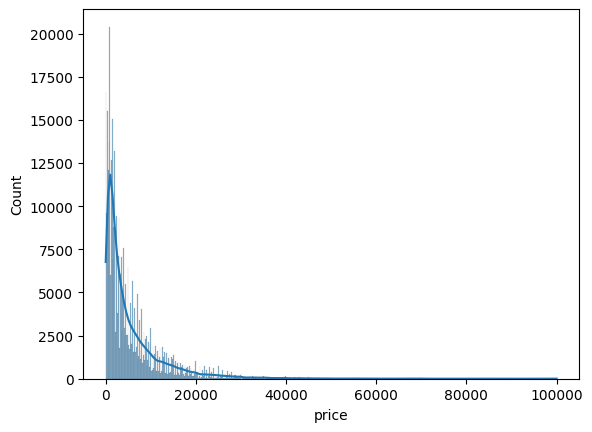

In [184]:
sns.histplot(data=df_filtered, x="price", kde=True)

In [185]:
#Le prix ne suit pas une distribution uniforme plutot une loi 

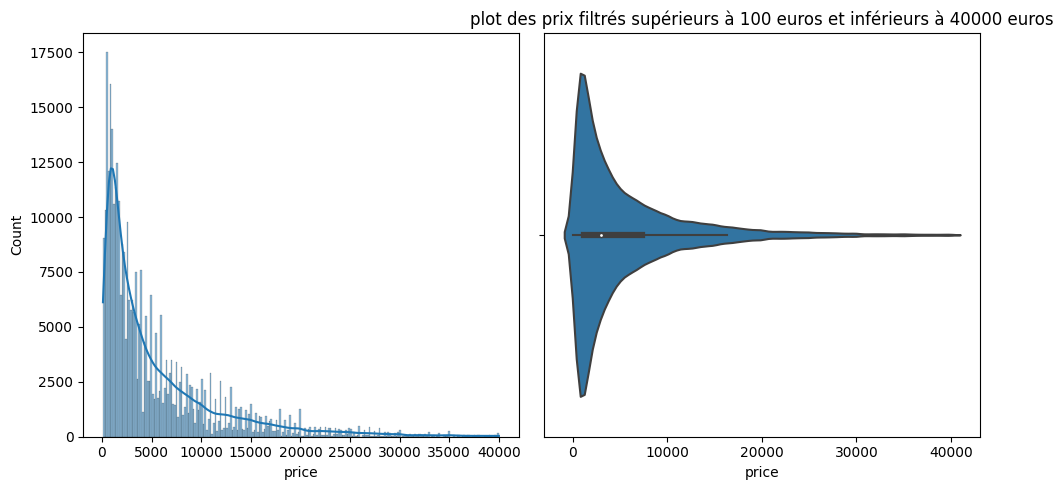

In [186]:
# Créer une grille de sous-graphes avec 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Premier sous-graphe - Histogramme
sns.histplot(data=df_clean[(df_clean["price"] <= 4e+04) & (df_clean["price"] >= 1e+02)], x="price", kde=True, ax=axes[0])

# Deuxième sous-graphe - Violin plot
sns.violinplot(data=df_clean[(df_clean["price"] <= 4e+04) & (df_clean["price"] >= 1e+02)], x="price", kde=True, ax=axes[1])

# Afficher les graphes
plt.title("plot des prix filtrés supérieurs à 100 euros et inférieurs à 40000 euros")
plt.tight_layout()
plt.show()

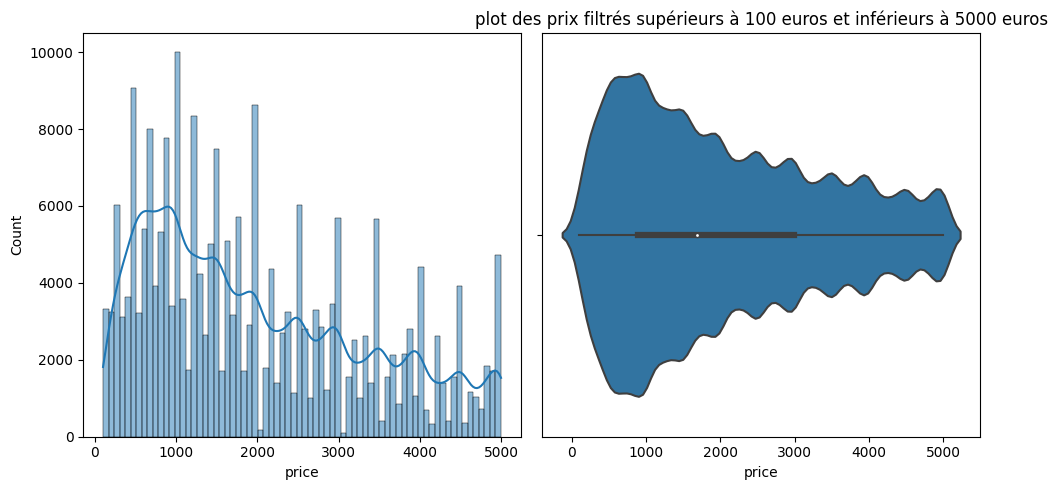

In [187]:
# Créer une grille de sous-graphes avec 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Premier sous-graphe - Histogramme
sns.histplot(data=df_clean[(df_clean["price"] <= 5e+03) & (df_clean["price"] >= 1e+02)], x="price", kde=True, ax=axes[0])

# Deuxième sous-graphe - Violin plot
sns.violinplot(data=df_clean[(df_clean["price"] <= 5e+03) & (df_clean["price"] >= 1e+02)], x="price", kde=True, ax=axes[1])

# Afficher les graphes
plt.title("plot des prix filtrés supérieurs à 100 euros et inférieurs à 5000 euros")
plt.tight_layout()
plt.show()

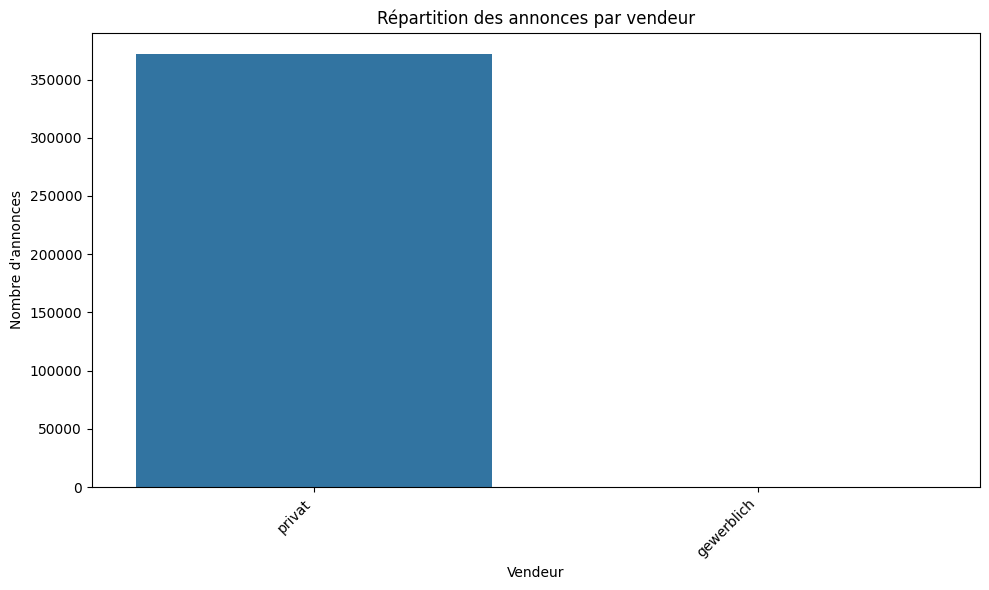

In [188]:
# Obtenir les décomptes des catégories de la variable "seller"
seller_counts = df_clean["seller"].value_counts()

# Tracer le graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=seller_counts.index, y=seller_counts.values)
plt.xlabel("Vendeur")
plt.ylabel("Nombre d'annonces")
plt.title("Répartition des annonces par vendeur")
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes des catégories pour faciliter la lisibilité
plt.tight_layout()
plt.show()


In [189]:
seller_counts

seller
privat        371521
gewerblich         3
Name: count, dtype: int64

In [190]:
df_clean[df_clean["seller"] == "gewerblich"]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
59155,2016-03-15 18:06:22,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,gewerblich,Angebot,100,control,kombi,2000,manuell,0,megane,150000,8,benzin,renault,NaN,2016-03-15 00:00:00,0,65232,2016-04-06 17:15:37
149393,2016-03-22 09:54:43,Chevrolet_Matiz_1.Hd_TÜV11/2017,gewerblich,Angebot,1100,test,kleinwagen,2006,manuell,38,matiz,150000,10,benzin,chevrolet,nein,2016-03-22 00:00:00,0,7973,2016-04-05 21:15:48
186181,2016-03-14 15:58:22,BMW_2000_AUTOMATIK_H_ZULASSUNG,gewerblich,Angebot,6900,control,limousine,1967,automatik,101,andere,70000,8,benzin,bmw,nein,2016-03-14 00:00:00,0,73614,2016-04-05 19:45:06


In [191]:
#Je pense que l'on pourrait enlever cette feature qui n'est pas du tout représentative de notre dataset

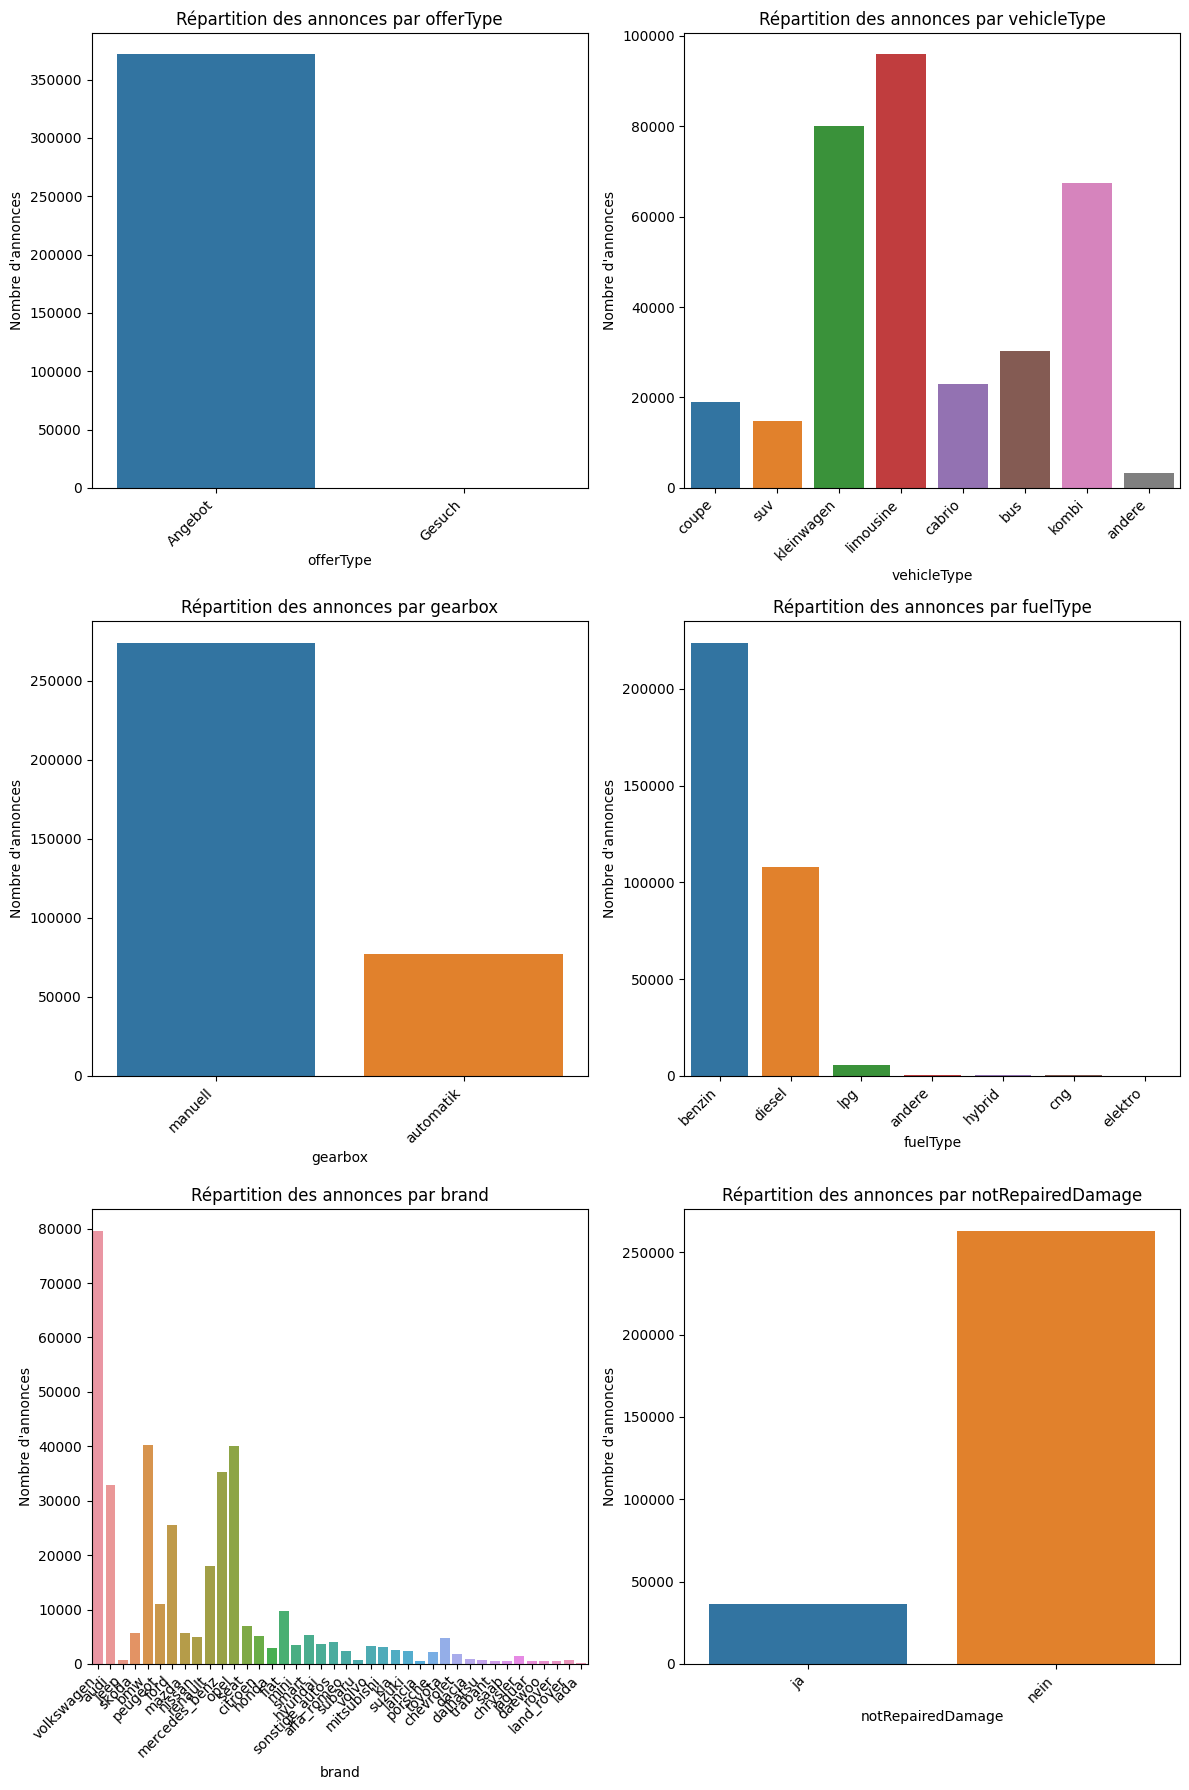

In [192]:
# Liste des colonnes catégorielles à étudier
categorical_columns = ["offerType", "vehicleType", "gearbox", "fuelType", "brand", "notRepairedDamage"]

# Configurer la taille de la figure globale pour accueillir tous les graphes
plt.figure(figsize=(12, 18))

# Boucle pour tracer les graphes pour chaque colonne catégorielle
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df_clean, x=col)
    plt.xlabel(col)
    plt.ylabel("Nombre d'annonces")
    plt.title(f"Répartition des annonces par {col}")
    plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes des catégories pour faciliter la lisibilité

# Ajuster l'espacement entre les graphes pour une meilleure mise en page
plt.tight_layout()

# Afficher les graphes
plt.show()

In [193]:
#Je pense que l'on pourrait enlever cette feature qui n'est pas du tout représentative de notre dataset
offerType_counts = df_clean["offerType"].value_counts()
offerType_counts

offerType
Angebot    371512
Gesuch         12
Name: count, dtype: int64

In [194]:
df_clean[df_clean["offerType"] == "Gesuch"]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
16744,2016-04-03 15:48:33,Suche_VW_T5_Multivan,privat,Gesuch,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,2016-04-03 00:00:00,0,29690,2016-04-05 15:16:06
90921,2016-03-27 14:55:45,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,privat,Gesuch,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,2016-03-27 00:00:00,0,50181,2016-04-07 11:45:18
144154,2016-03-14 18:51:39,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,privat,Gesuch,0,test,coupe,2004,manuell,0,3er,150000,1,benzin,bmw,nein,2016-03-14 00:00:00,0,86956,2016-03-25 06:17:06
150400,2016-03-07 21:37:03,Suche_Mercedes_300D__W124__Silberdistel_metall...,privat,Gesuch,0,control,NaN,1985,NaN,109,e_klasse,150000,0,NaN,mercedes_benz,NaN,2016-03-07 00:00:00,0,68169,2016-03-07 21:37:03
164788,2016-03-28 15:56:38,Suche_bitte_hilfe,privat,Gesuch,0,control,NaN,2016,manuell,0,astra,20000,2,diesel,opel,nein,2016-03-28 00:00:00,0,26215,2016-03-28 15:56:38
183716,2016-03-11 10:57:56,Clio_3_Bremsen_vorne_und_hinten_wechseln__EILT!!,privat,Gesuch,0,test,kleinwagen,2005,manuell,0,clio,150000,12,benzin,renault,nein,2016-03-11 00:00:00,0,79423,2016-03-11 23:46:30
251359,2016-03-21 07:55:59,SZUKAM_taniego_TRANSPORTU_auta_do_Polski,privat,Gesuch,150,control,NaN,2000,NaN,0,NaN,5000,1,NaN,sonstige_autos,NaN,2016-03-21 00:00:00,0,50129,2016-03-22 11:45:33
285243,2016-03-15 18:55:15,Trabant_gesucht!!!!,privat,Gesuch,2000,control,NaN,1980,NaN,0,andere,50000,0,NaN,trabant,NaN,2016-03-15 00:00:00,0,1609,2016-03-20 16:16:04
315232,2016-03-28 19:55:44,Ford_Fiesta_2005_mit_Unfallschaden,privat,Gesuch,1550,control,kleinwagen,2005,manuell,90,fiesta,150000,3,diesel,ford,ja,2016-03-28 00:00:00,0,30827,2016-03-28 19:55:44
327204,2016-03-13 07:52:29,Kaufe_Bastlerfahrzeuge_aller_art.,privat,Gesuch,555,test,NaN,2000,manuell,55,NaN,150000,3,NaN,sonstige_autos,ja,2016-03-13 00:00:00,0,34308,2016-03-25 12:48:34


In [195]:
#Il y a beaucoup de mauvaise data pour Gesuch tant sur le prix que sur le powerPS il est préférable de l'enlever

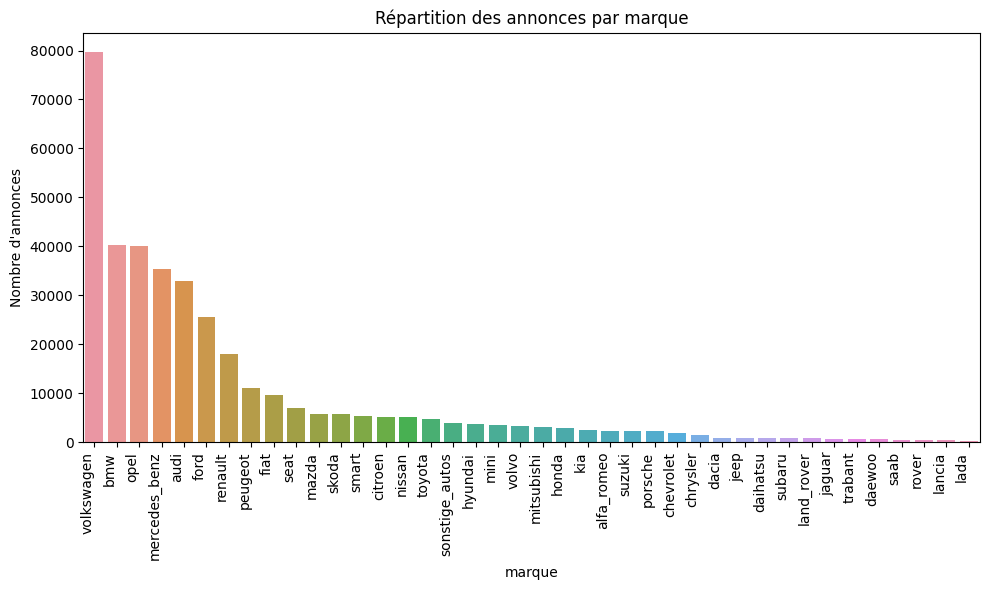

In [196]:
#Ajustement des étiquettes pour le plot brand pour une meilleure lisibilité

# Obtenir les décomptes des catégories de la variable "brand"
seller_counts = df_clean["brand"].value_counts()

# Tracer le graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=seller_counts.index, y=seller_counts.values)
plt.xlabel("marque")
plt.ylabel("Nombre d'annonces")
plt.title("Répartition des annonces par marque")
plt.xticks(rotation=90, ha='right')  # Rotation des étiquettes des catégories pour faciliter la lisibilité
plt.tight_layout()
plt.show()


In [197]:
#Volksawagen domine ce qui est cohérent avec le dataset qui est allemand donc une favorisation des marques allemandes

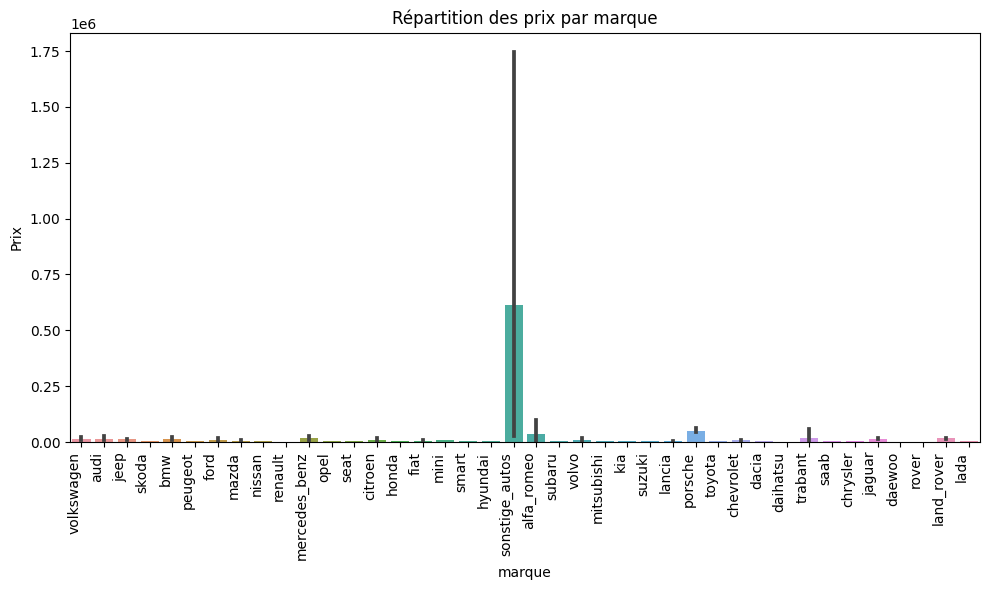

In [198]:
#Ajustement des étiquettes pour le plot brand pour une meilleure lisibilité

# Obtenir les décomptes des catégories de la variable "brand"
seller_counts = df_clean["brand"].value_counts()

# Tracer le graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=df_clean.brand, y=df_clean.price)
plt.xlabel("marque")
plt.ylabel("Prix")
plt.title("Répartition des prix par marque")
plt.xticks(rotation=90, ha='right')  # Rotation des étiquettes des catégories pour faciliter la lisibilité
plt.tight_layout()
plt.show()


In [199]:
#On observe que la marque possède quelques modèles avec des valeurs trop extrèmes
df_clean[df_clean["brand"] == "sonstige_autos"].price.sort_values()

183306             0
163263             0
163328             0
164348             0
164473             0
             ...    
281833      10000000
361451      10010011
189737      99999999
150909      99999999
129969    2147483647
Name: price, Length: 3982, dtype: int64

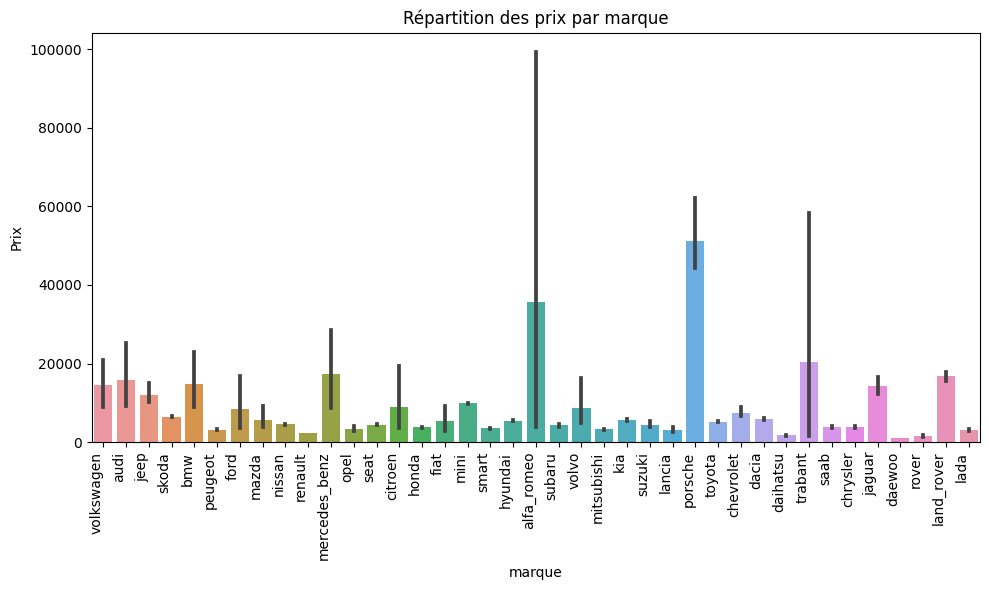

In [200]:
#Ajustement des étiquettes pour le plot brand pour une meilleure lisibilité

# Filtrer le DataFrame pour exclure la marque "sonstige_autos"
df_filtered = df_clean[df_clean["brand"] != "sonstige_autos"]

# Obtenir les décomptes des catégories de la variable "brand"
seller_counts = df_filtered["brand"].value_counts()

# Tracer le graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=df_filtered.brand, y=df_filtered.price)
plt.xlabel("marque")
plt.ylabel("Prix")
plt.title("Répartition des prix par marque")
plt.xticks(rotation=90, ha='right')  # Rotation des étiquettes des catégories pour faciliter la lisibilité
plt.tight_layout()
plt.show()


In [201]:
""""
Je clean la data frame de la manière suivante : 
Numérique : 
prix filtrés entre 500 et 200 000 
years of registration filtrées entre 1950 et 2023
powerPS filtré entre 50 et 1000
nbOfPicture colonne drop car toute a 0
le code postal allemand est composé de 5 chiffres donc filtre entre 10 000 et 99 9999

Je préfère privillégier des intervalles qui ont un sens physique plutot que d'utiliser une méthode d'outlier telle que le Z-score modified ici
car cela a plus de sens avec le dataset. 

Catégorielle : 
seller 3 lignes gewerbich donc improbable > drop la colonne seller
offerType gesush bcp de mauvaise data > drop la colonne 


dateCreated n'apporte aucune information pertinente car nous avons dateCrawled donc drop la colonne 
"""


'"\nJe clean la data frame de la manière suivante : \nNumérique : \nprix filtrés entre 500 et 200 000 \nyears of registration filtrées entre 1950 et 2023\npowerPS filtré entre 50 et 1000\nnbOfPicture colonne drop car toute a 0\nle code postal allemand est composé de 5 chiffres donc filtre entre 10 000 et 99 9999\n\nJe préfère privillégier des intervalles qui ont un sens physique plutot que d\'utiliser une méthode d\'outlier telle que le Z-score modified ici\ncar cela a plus de sens avec le dataset. \n\nCatégorielle : \nseller 3 lignes gewerbich donc improbable > drop la colonne seller\nofferType gesush bcp de mauvaise data > drop la colonne \n\n\ndateCreated n\'apporte aucune information pertinente car nous avons dateCrawled donc drop la colonne \n'

In [202]:
df_clean = df_clean[(df_clean["price"] >= 500) & (df_clean["price"] <= 200000)]
df_clean = df_clean[(df_clean["yearOfRegistration"] >= 1950) & (df_clean["yearOfRegistration"] <= 2023)]
df_clean = df_clean[(df_clean["powerPS"] >= 50) & (df_clean["powerPS"] <= 1000)]
df_clean = df_clean[(df_clean["postalCode"] >= 10000) & (df_clean["postalCode"] <= 99999)]
df_clean.drop("nrOfPictures", axis=1, inplace=True)
df_clean.drop("seller", axis=1, inplace=True)
df_clean.drop("offerType", axis=1, inplace=True)

In [203]:
df_clean.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,287717.000000,287717.000000,287717.000000,287717.000000,287717.000000,287717.000000
mean,6637.699910,2004.037791,130.118961,125012.303757,6.058293,53978.652440
std,8625.541041,6.868398,62.448288,39415.776056,3.552687,24187.132591
min,500.000000,1950.000000,50.000000,5000.000000,0.000000,10115.000000
25%,1650.000000,2000.000000,87.000000,100000.000000,3.000000,33729.000000
50%,3800.000000,2004.000000,116.000000,150000.000000,6.000000,52379.000000
75%,8499.000000,2009.000000,156.000000,150000.000000,9.000000,73453.000000
max,200000.000000,2019.000000,1000.000000,150000.000000,12.000000,99998.000000


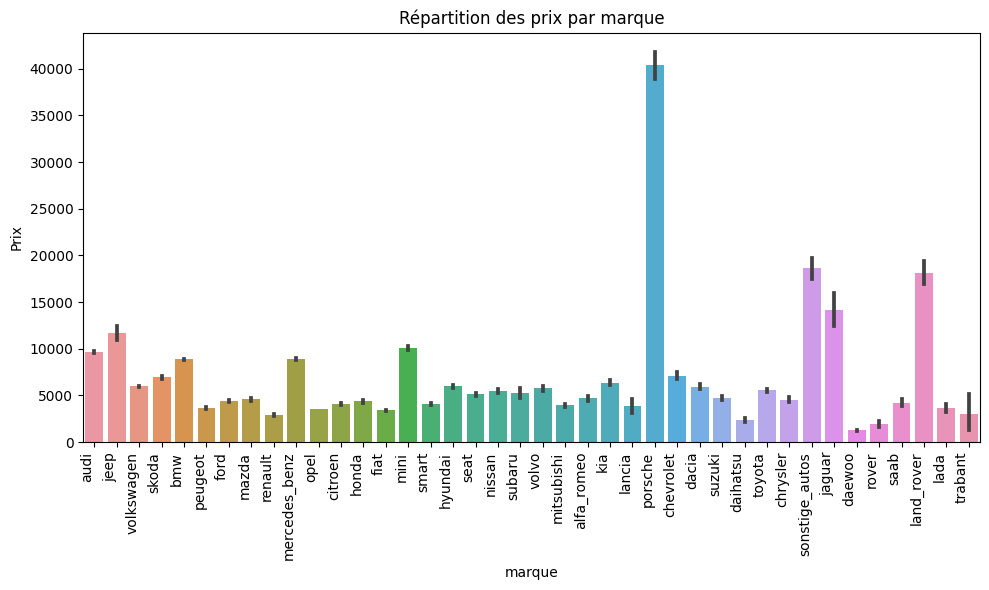

In [204]:
#Ajustement des étiquettes pour le plot brand pour une meilleure lisibilité

# Obtenir les décomptes des catégories de la variable "brand"
seller_counts = df_clean["brand"].value_counts()

# Tracer le graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=df_clean.brand, y=df_clean.price)
plt.xlabel("marque")
plt.ylabel("Prix")
plt.title("Répartition des prix par marque")
plt.xticks(rotation=90, ha='right')  # Rotation des étiquettes des catégories pour faciliter la lisibilité
plt.tight_layout()
plt.show()

In [205]:
df_clean.columns

Index(['dateCrawled', 'name', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

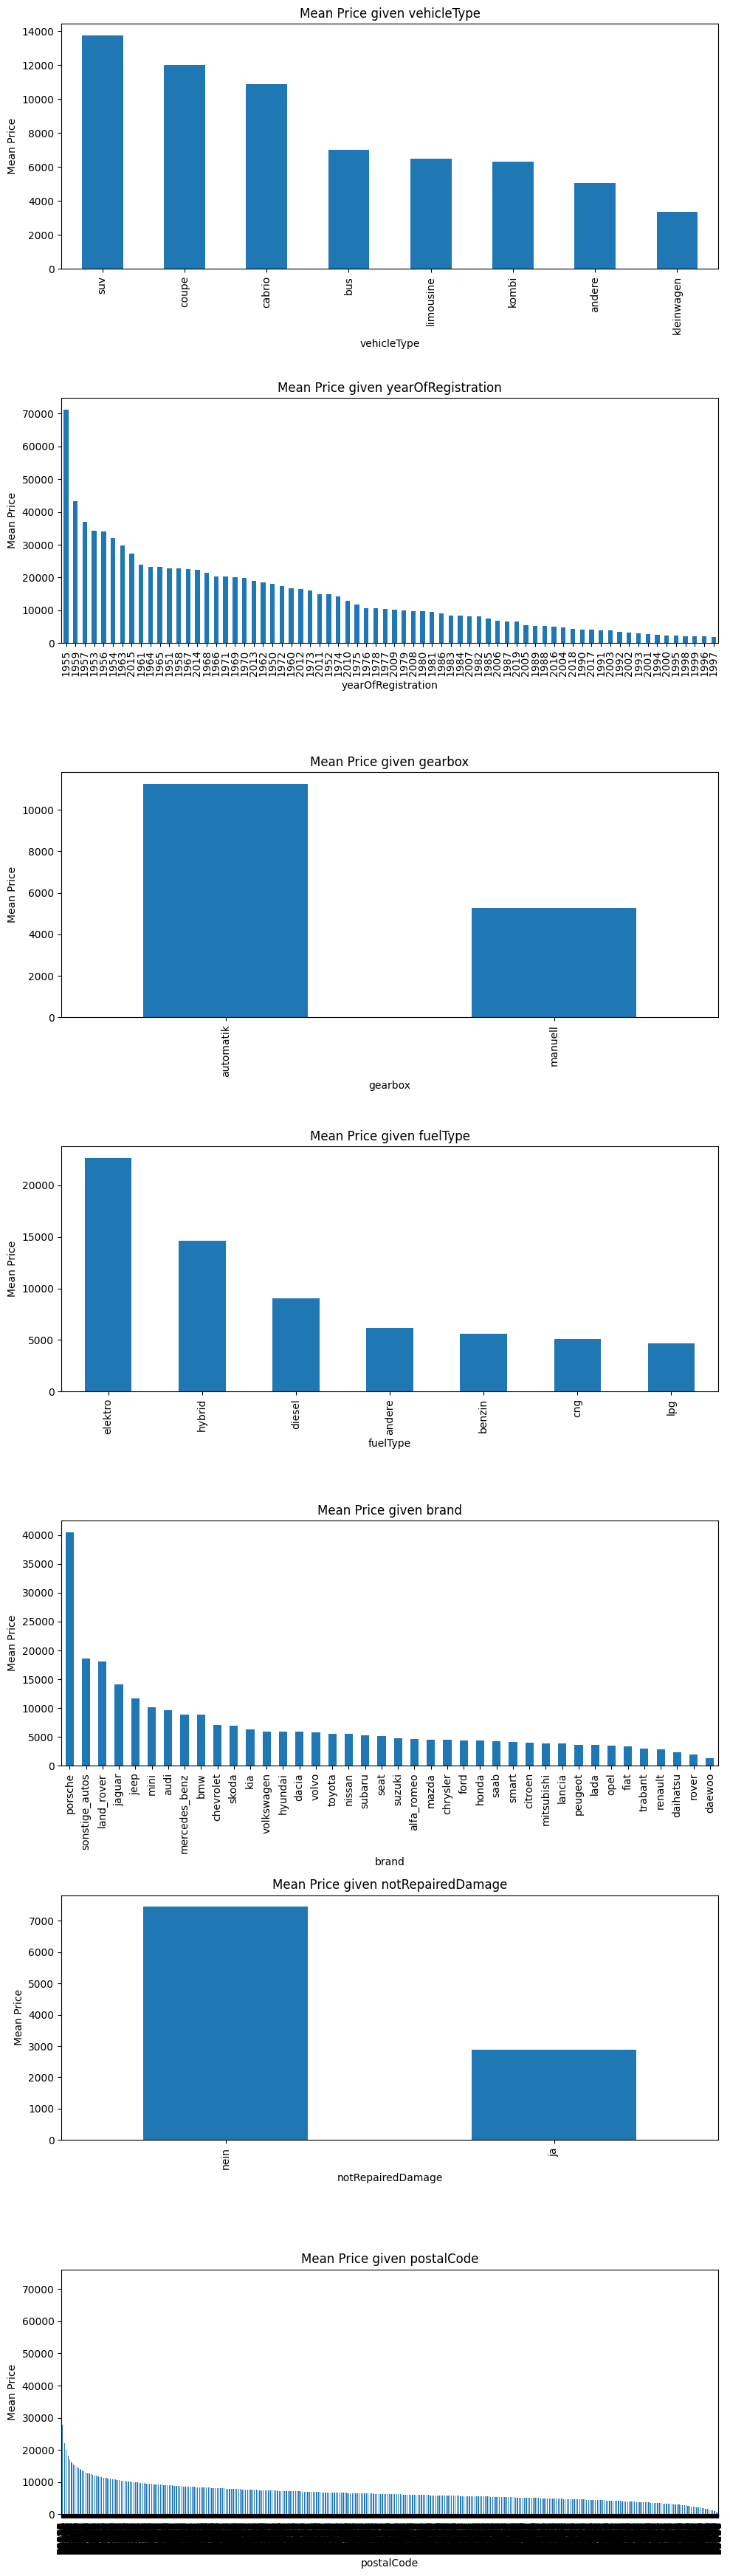

In [206]:
#Etudions la moyenne des prix par marque : 

# Liste des colonnes catégorielles à étudier
interesting_columns = ["vehicleType", "yearOfRegistration","gearbox", "fuelType", "brand", "notRepairedDamage", "postalCode"]

# Create subplots to accommodate all the bar plots
num_plots = len(interesting_columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 5*num_plots))

# Loop pour chaque colonne et affichage bar chart
for i, col in enumerate(interesting_columns):
    df_grouped = df_clean.groupby([col])['price'].mean().sort_values(ascending=False)
    df_grouped = pd.DataFrame(df_grouped)
    ax = df_grouped.plot(kind='bar', ax=axes[i], legend=False)
    ax.set_xlabel(col)
    ax.set_ylabel('Mean Price')
    ax.set_title(f'Mean Price given {col}')

plt.tight_layout()
plt.show()

In [209]:
""""
On observe que : 

suv plus cher puis coupe et cabrio en moyenne
les années 1950 - 1960 sont en moyenne les plus cheres
boite auto sont en moyenne plus cheres
les electriques puis hybrides sont les plus cheres en moyenne
la marque porsche est de loin la plus chere en moyenne

"""


'"\nOn observe que : \n\nsuv plus cher puis coupe et cabrio en moyenne\nles années 1950 - 1960 sont en moyenne les plus cheres\nboite auto sont en moyenne plus cheres\nles electriques puis hybrides sont les plus cheres en moyenne\nla marque porsche est de loin la plus chere en moyenne\n\n'

In [210]:
#Le plot postalCode n'est pas très lisible, je regroupe les données par région en conservant les 2 premiers chiffres seulement 

# Appliquer la fonction pour extraire les deux premiers chiffres
df_clean['postalCode'] = df_clean['postalCode'].apply(lambda x: int(str(x)[:2]))



,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33,2016-04-06 19:17:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,2016-03-19 19:53:49,turbo_defekt,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,2016-03-19 00:00:00,96,2016-03-19 20:44:43
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,26,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,87,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,40,2016-03-24 12:45:21


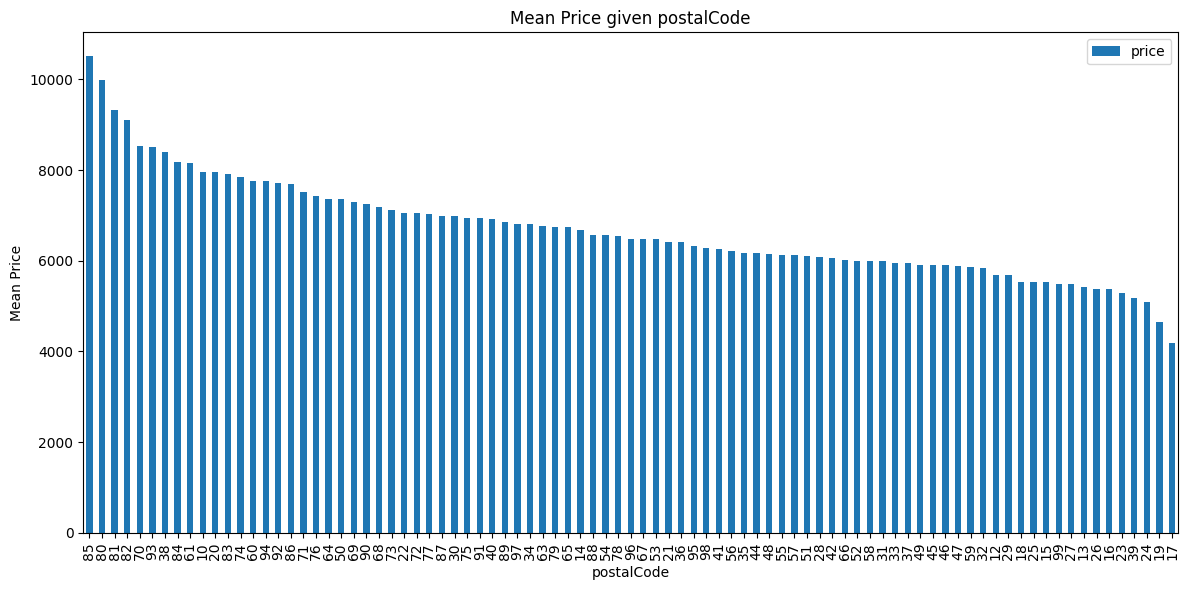

In [213]:
# Définir la taille souhaitée du plot (par exemple, 12 pouces de largeur et 6 pouces de hauteur)
fig, ax = plt.subplots(figsize=(12, 6))


df_post = df_clean.groupby(["postalCode"])['price'].mean().sort_values(ascending=False)
df_post = pd.DataFrame(df_post)

# Tracer le graphique en barres
df_post.plot(kind='bar', ax=ax)

ax.set_xlabel("postalCode")
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price given postalCode')

# Afficher le plot
plt.tight_layout()
plt.show()


In [ ]:
#85, 80 et 81 correspondent a la ville de Munich captiale de la Bavière

Text(0.5, 0, 'powerPS')

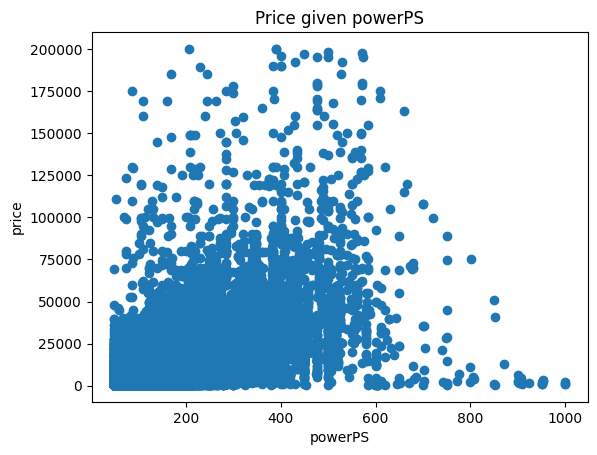

In [207]:
plt.scatter(df_clean["powerPS"], df_clean["price"])
plt.title("Price given powerPS")
plt.ylabel('price')
plt.xlabel('powerPS')

In [214]:
#Pas de corrélation apparente entre les chevaux et le prix mais cela peut etre du au mélange des modèles de voitures 